In [1]:
# import ML tools
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from pandas import json_normalize
import json
import datetime
from scipy.stats import pearsonr

In [2]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


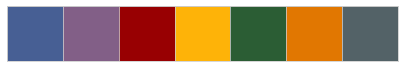

In [3]:
# import custom palette
import my_palette as mp

To begin, I need to munge the data a bit, as it is generalized for use on a variety of problems.

> **MOVIE DATASET**

In [4]:
# read in movie dataset
movie_df = pd.read_json('tmdb_movie_clean.json')
movie_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,171236,171237,171238,171239,171240,171241,171242,171243,171244,171245
budget,4e+06,2.1e+07,42000,1.1e+07,9.4e+07,5.5e+07,1.5e+07,839727,1.28e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,"[Crime, Comedy]","[Action, Thriller, Crime]",[Documentary],"[Adventure, Action, Science Fiction]","[Animation, Family]","[Comedy, Drama, Romance]",[Drama],"[Mystery, Drama]","[Drama, Crime]","[Horror, Thriller, Mystery]",...,[Documentary],[],[],[],[],[Music],[],[Documentary],[],[]
id,5,6,8,11,12,13,14,15,16,17,...,701689,701692,701695,701702,701705,701706,701707,701710,701714,701729
imdb_id,tt0113101,tt0107286,tt0825671,tt0076759,tt0266543,tt0109830,tt0169547,tt0033467,tt0168629,tt0411267,...,None,None,None,None,None,None,None,tt1821695,None,None
overview,It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in...","Newspaper magnate, Charles Foster Kane is take...","Selma, a Czech immigrant on the verge of blind...",Adèle and her daughter Sarah are traveling on ...,...,Set at CREST (the Centre for Research and Educ...,Tom and Jerry is an American animated franchis...,This full concert broadcast comes from our 201...,"Shakespeare's heartbreaking tale, Nureyev's bl...",Courage the Cowardly Dog is an American animat...,"Radiohead's set from June 30, 2017 at the Rock...",‘Rising Silence’ is a journey of relationships...,There are approximately 5.7 million people in ...,"SUM 41 performs live at The House of Blues, Cl...",A tantalising trio of cult lesbian movies from...
popularity,13.532,11.817,2.629,90.645,33.313,33.781,23.513,18.872,16.037,6.766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1995-12-09T00:00:00.000Z,1993-10-15T00:00:00.000Z,2006-01-01T00:00:00.000Z,1977-05-25T00:00:00.000Z,2003-05-30T00:00:00.000Z,1994-07-06T00:00:00.000Z,1999-09-15T00:00:00.000Z,1941-04-30T00:00:00.000Z,2000-05-17T00:00:00.000Z,2005-09-28T00:00:00.000Z,...,2019-12-31T00:00:00.000Z,1940-02-10T00:00:00.000Z,2017-06-01T00:00:00.000Z,None,None,2017-06-30T00:00:00.000Z,None,None,None,2010-10-04T00:00:00.000Z
revenue,4.25735e+06,1.21369e+07,NaN,7.75398e+08,9.40336e+08,6.77388e+08,3.56297e+08,2.32177e+07,4.00319e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,98,110,80,121,100,142,122,119,141,87,...,80,NaN,NaN,144,NaN,129,75,85,75,140
tagline,Twelve outrageous guests. Four scandalous requ...,Don't move. Don't whisper. Don't even breathe.,A Megacities remix.,"A long time ago in a galaxy far, far away...",There are 3.7 trillion fish in the ocean. They...,Life is like a box of chocolates...you never k...,Look closer.,It's terrific!,You don't need eyes to see.,One of the living for one of the dead.,...,None,None,None,"Shakespeare's heartbreaking tale, Nureyev's bl...",None,None,None,Bipolar and Living,"concert, punk rock, live",None


In [5]:
# convert release dates to datetime objects and remove timezone-aware index
movie_df['release_date'] = pd.to_datetime(movie_df['release_date']).dt.tz_localize(None)
movie_df.head().transpose()

,0,1,2,3,4
budget,4e+06,2.1e+07,42000,1.1e+07,9.4e+07
genres,"[Crime, Comedy]","[Action, Thriller, Crime]",[Documentary],"[Adventure, Action, Science Fiction]","[Animation, Family]"
id,5,6,8,11,12
imdb_id,tt0113101,tt0107286,tt0825671,tt0076759,tt0266543
overview,It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp..."
popularity,13.532,11.817,2.629,90.645,33.313
release_date,1995-12-09 00:00:00,1993-10-15 00:00:00,2006-01-01 00:00:00,1977-05-25 00:00:00,2003-05-30 00:00:00
revenue,4.25735e+06,1.21369e+07,NaN,7.75398e+08,9.40336e+08
runtime,98,110,80,121,100
tagline,Twelve outrageous guests. Four scandalous requ...,Don't move. Don't whisper. Don't even breathe.,A Megacities remix.,"A long time ago in a galaxy far, far away...",There are 3.7 trillion fish in the ocean. They...


In [6]:
# observe movie DataFrame
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171246 entries, 0 to 171245
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   budget        13635 non-null   float64       
 1   genres        171246 non-null  object        
 2   id            171246 non-null  int64         
 3   imdb_id       129045 non-null  object        
 4   overview      167715 non-null  object        
 5   popularity    171198 non-null  float64       
 6   release_date  152368 non-null  datetime64[ns]
 7   revenue       8309 non-null    float64       
 8   runtime       120310 non-null  float64       
 9   tagline       46123 non-null   object        
 10  title         171246 non-null  object        
 11  vote_average  81872 non-null   float64       
 12  vote_count    82029 non-null   float64       
 13  cast          171246 non-null  object        
 14  crew          171246 non-null  object        
 15  reviews       171

Since I am not looking at text data for this project, I will drop overview, tagline, and reviews columns.<br>
Because I'm not collecting data from other sources, I will drop the IMDb ID column.<br>
The popularity values reflect current trends. I will not use that, because I want to observe these movies in their own time frame.<br>
Since I am only looking at acting departments, I will not need the crew data.

In [7]:
# drop columns that will not be used
movie_df.drop(['imdb_id', 'overview', 'popularity', 'tagline', 'crew', 'reviews'], axis=1, inplace=True)

In [8]:
# rename TMDb movie ID to distinguish it from actor id's
movie_df.rename(columns={'id': 'movie_id'}, inplace=True)

Since this is all the data I will use for the project, I will drop all rows where any value is missing.

In [9]:
movie_df.dropna(inplace=True)

I need to check for empty lists in the genres and cast columns.

In [10]:
# count empty cast lists
movie_df['cast'].str.len().eq(0).sum()

13

In [11]:
# remove empty cast lists
movie_df = movie_df[movie_df['cast'].map(lambda d: len(d)) > 0]

In [12]:
# count empty genres lists
movie_df['genres'].str.len().eq(0).sum()

19

In [13]:
# remove empty genres lists
movie_df = movie_df[movie_df['genres'].map(lambda d: len(d)) > 0]

In [14]:
# observe how many movies we have left
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 169380
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   budget        5805 non-null   float64       
 1   genres        5805 non-null   object        
 2   movie_id      5805 non-null   int64         
 3   release_date  5805 non-null   datetime64[ns]
 4   revenue       5805 non-null   float64       
 5   runtime       5805 non-null   float64       
 6   title         5805 non-null   object        
 7   vote_average  5805 non-null   float64       
 8   vote_count    5805 non-null   float64       
 9   cast          5805 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 498.9+ KB


In [15]:
# observe numerical values
movie_df.describe()

,budget,movie_id,revenue,runtime,vote_average,vote_count
count,5.805000e+03,5805.00000,5.805000e+03,5805.000000,5805.000000,5805.000000
mean,3.200695e+07,90452.89509,9.449903e+07,108.505254,6.409716,1541.706977
std,4.165488e+07,144658.94179,1.811366e+08,20.417376,0.983087,2553.825764
min,1.000000e+00,5.00000,1.000000e+00,70.000000,1.000000,1.000000
25%,5.000000e+06,9339.00000,5.634828e+06,95.000000,5.800000,152.000000
50%,1.775977e+07,16668.00000,2.978900e+07,105.000000,6.400000,589.000000
75%,4.000000e+07,84174.00000,1.020000e+08,118.000000,7.000000,1748.000000
max,3.800000e+08,691633.00000,2.797801e+09,338.000000,10.000000,25603.000000


The budget and revenue each have minimum values of $1. I will examine this and determine reasonable minimum values to accept.<br>
I am going to combine these two features into a return on investment (ROI) feature to observe profitability.

The runtime looks good, as it has the minimum length allowable for a feature length movie. I will look closer at the movies with long runtimes for errors.

The vote average is from one to ten, which looks good.<br>
The vote count looks good, as well.<br>
I will combine these last two features into a weighted average to penalize movies with few votes.

> **Monetary Errors**

Monetary figures (budget and revenue) for some movies have been carelessly recorded at TMDb without the proper decimal scale.<br>
I am only using the ratio of these figures.<br>
So, I will only be concerned with errors of scale that have been imposed on one of them but not the other.<br>
I will show a few of these for clarity.

In [16]:
# observe a few movies that returned less than 10% of their investments back and had revenues less than $1000
movie_df.loc[(np.divide(movie_df['budget'], movie_df['revenue']) > 10) & (movie_df['revenue'] < 1000)].head()

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
1403,2200000.0,"[Drama, Music, Comedy]",3121,1975-06-11,10.0,160.0,Nashville,7.4,185.0,"[{'cast_id': 20, 'character': 'Norman', 'credi..."
2093,68000000.0,"[Drama, Horror, Science Fiction, Thriller]",6171,2003-03-21,75.0,136.0,Dreamcatcher,5.4,1092.0,"[{'cast_id': 2, 'character': 'Col. Abraham Cur..."
2340,30000000.0,"[Action, Science Fiction, Thriller]",7916,2008-10-02,743.0,95.0,Far Cry,3.6,154.0,"[{'cast_id': 1, 'character': 'Jack Carver', 'c..."
4631,25000000.0,"[Action, Comedy, Romance, Thriller]",12518,1992-08-28,35.0,96.0,Honeymoon in Vegas,5.5,158.0,"[{'cast_id': 2, 'character': 'Jack Singer', 'c..."
5816,23000000.0,"[Comedy, Romance]",14844,2004-01-09,12.0,111.0,Chasing Liberty,6.2,395.0,"[{'cast_id': 1, 'character': 'Anna Foster', 'c..."


In [17]:
# count these movies
np.sum((np.divide(movie_df['budget'], movie_df['revenue']) > 10) & (movie_df['revenue'] < 1000))

29

These movies all have revenue values that should be have been recorded as factors of 10 higher.<br>
What should have been \\$48 million, has been entered as \\$48, but the corresponding budget value is scaled correctly.<br>
I am choosing to filter them by revenues less than \\$1,000, because that is the smallest factor of 10 that leads to this common shorthand mistake.<br>
In other words, it is more common to enter \\$48 for \\$48,000, but not for \\$4,800 or \\$480.

In [18]:
# filter out these movies
movie_df.drop(index=movie_df.loc[(np.divide(movie_df['budget'], movie_df['revenue']) > 10) 
                                 & (movie_df['revenue'] < 1000)].index, inplace=True)

The reverse situation is true, as well.<br>
Here the budget value is not the correct scale, but the revenue figure is correct.

In [19]:
# observe all movies that returned more than 1000x their investments back and had budgets less than $1000
movie_df.loc[(np.divide(movie_df['revenue'], movie_df['budget']) > 900) & (movie_df['budget'] < 1000)]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
696,218.0,"[Documentary, Drama]",1435,2003-10-19,1162014.0,91.0,Tarnation,7.1,40.0,"[{'cast_id': 2, 'character': 'Herself', 'credi..."
2491,111.0,"[Drama, Romance]",8583,1998-02-20,4530929.0,111.0,Dangerous Beauty,7.1,119.0,"[{'cast_id': 3, 'character': 'Veronica Franco'..."
6081,90.0,"[Comedy, Drama]",15402,2005-09-14,1410778.0,91.0,The Notorious Bettie Page,6.4,85.0,"[{'cast_id': 1, 'character': 'Bettie Page', 'c..."
21214,93.0,"[Comedy, Drama, Romance]",50217,2011-01-28,2500000.0,107.0,From Prada to Nada,5.3,200.0,"[{'cast_id': 9, 'character': 'Nora', 'credit_i..."
24362,1.0,"[Comedy, Romance]",59296,2011-06-03,1378.0,90.0,"Love, Wedding, Marriage",5.2,127.0,"[{'cast_id': 1, 'character': 'Eva', 'credit_id..."
30568,10.0,"[Horror, Thriller]",78383,2013-09-28,10000000.0,99.0,Nurse 3-D,4.9,197.0,"[{'cast_id': 5, 'character': 'Abby Russell', '..."
34442,855.0,[Action],89139,1990-02-23,855810.0,102.0,Angel Town,6.2,12.0,"[{'cast_id': 3, 'character': 'Jacques', 'credi..."
55213,200.0,[Drama],189073,2009-04-11,1000000.0,89.0,Saved,5.0,2.0,"[{'cast_id': 1, 'character': 'Julia Weston, Pe..."
125556,1.0,[TV Movie],450154,2017-03-31,1033113.0,144.0,Bellator 175: Rampage vs. King Mo 2,7.0,1.0,"[{'cast_id': 0, 'character': 'Muhammed Lawal',..."


In [20]:
# filter out these movies, as well
movie_df.drop(index=movie_df.loc[(np.divide(movie_df['revenue'], movie_df['budget']) > 1000) 
                                 & (movie_df['budget'] < 1000)].index, inplace=True)

In [21]:
# reset the index
movie_df.reset_index(drop=True, inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
0,4000000.0,"[Crime, Comedy]",5,1995-12-09,4257354.0,98.0,Four Rooms,6.0,1561.0,"[{'cast_id': 42, 'character': 'Ted the Bellhop..."
1,21000000.0,"[Action, Thriller, Crime]",6,1993-10-15,12136938.0,110.0,Judgment Night,6.5,145.0,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c..."
5765,27000000.0,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,48320000.0,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."
5766,1974853.0,"[Action, Drama]",691633,2015-04-10,3554736.0,147.0,Rana Vikrama,5.0,1.0,"[{'cast_id': 8, 'character': 'Rana Vikrama/ACP..."


> **Inflation**

Before doing anything more with columns that have dollar values, I need to adjust them for inflation.

I will read in the Consumer Price Index (CPI) data I downloaded from the Federal Reserve Economic Data (FRED).<br>
I have already created a CPI multiplier column that can be used to convert values to dollars for the time when this dataset was extracted.<br>
This dataset hold monthly inflation rates from the first month of 1913 until March of 2020.

In [22]:
# load inflation data
inflation_df = pd.read_csv('cpi_multiplier.csv', index_col=0)
inflation_df.iloc[np.r_[0:3, -3:0]]

,date,cpiaucns,cpi_multiplier
0,1913-01-01,9.800,26.338265
1,1913-02-01,9.800,26.338265
2,1913-03-01,9.800,26.338265
1284,2020-01-01,257.971,1.000558
1285,2020-02-01,258.678,0.997824
1286,2020-03-01,258.115,1.000000


In [23]:
# checking that the data is clean
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1287 non-null   object 
 1   cpiaucns        1287 non-null   float64
 2   cpi_multiplier  1287 non-null   float64
dtypes: float64(2), object(1)
memory usage: 40.2+ KB


I need to convert the dates to datetime objects.

In [24]:
# convert with UTC data
inflation_df['date'] = pd.to_datetime(inflation_df['date'], format='%Y/%m/%d')
inflation_df['date'].dtype

dtype('<M8[ns]')

Now, I need to merge this into the main DataFrame.<br>
First, I need to sort the main DataFrame by date.

In [25]:
# sort by release date
movie_df.sort_values('release_date', inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
4391,5700.0,"[Drama, Crime]",96128,1913-11-24,1800000.0,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '..."
307,100000.0,"[Drama, History, War]",618,1915-02-08,11000000.0,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'..."
5624,14000000.0,"[Action, Thriller, Horror]",514847,2020-03-11,6512500.0,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred..."
5765,27000000.0,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,48320000.0,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."


Now, I will bring the inflation data into my main DataFrame.

In [26]:
# merge the two datasets aligning the CPI dates to the nearest release dates going forward
movie_df = pd.merge_asof(movie_df, inflation_df, left_on='release_date', right_on='date')
movie_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,5757,5758,5759,5760,5761,5762,5763,5764,5765,5766
budget,5700,100000,8.39475e+06,1e+06,200000,250000,120000,1.1e+06,1.13565e+06,923000,...,7.5e+07,7e+06,8.5e+07,1.09e+08,1e+07,3e+06,9e+06,4.2e+07,1.4e+07,2.7e+07
genres,"[Drama, Crime]","[Drama, History, War]","[Drama, History]","[Fantasy, Drama]","[Adventure, Drama, Action, Science Fiction]","[Comedy, Drama]",[Drama],[Drama],"[Romance, Adventure, Fantasy]","[Adventure, Comedy, Drama]",...,"[Action, Crime, Comedy]","[Science Fiction, Fantasy, Horror]","[Action, Science Fiction, Comedy, Family]","[Drama, Adventure, Family]","[Horror, Mystery, Thriller]",[Comedy],"[Thriller, Science Fiction, Horror]","[Action, Science Fiction]","[Action, Thriller, Horror]","[Mystery, Action, Crime, Drama, Thriller]"
movie_id,96128,618,3059,278480,30266,54242,278093,35227,28963,962,...,495764,539537,454626,481848,555974,566927,570670,338762,514847,686704
release_date,1913-11-24 00:00:00,1915-02-08 00:00:00,1916-09-04 00:00:00,1916-10-16 00:00:00,1916-12-24 00:00:00,1918-08-01 00:00:00,1919-08-26 00:00:00,1922-01-11 00:00:00,1924-03-18 00:00:00,1925-06-25 00:00:00,...,2020-02-05 00:00:00,2020-02-12 00:00:00,2020-02-12 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-26 00:00:00,2020-03-05 00:00:00,2020-03-11 00:00:00,2020-03-16 00:00:00
revenue,1.8e+06,1.1e+07,4e+06,1.39e+06,8e+06,8e+06,3.6e+06,400200,1.21388e+06,2.5e+06,...,2.01858e+08,4.70785e+07,2.65494e+08,1.07605e+08,2.03115e+07,1.07e+07,1.23415e+08,2.45736e+07,6.5125e+06,4.832e+07
runtime,88,193,197,180,105,93,80,143,149,95,...,109,109,99,100,86,92,124,110,90,115
title,Traffic in Souls,The Birth of a Nation,Intolerance: Love's Struggle Throughout the Ages,A Daughter of the Gods,"20,000 Leagues Under the Sea",Mickey,The Miracle Man,Foolish Wives,The Thief of Bagdad,The Gold Rush,...,Birds of Prey (and the Fantabulous Emancipatio...,Fantasy Island,Sonic the Hedgehog,The Call of the Wild,Brahms: The Boy II,Impractical Jokers: The Movie,The Invisible Man,Bloodshot,The Hunt,Scarlet Tulips
vote_average,5.6,6.3,7.5,5,6.1,7,3,6.7,7.4,8,...,7.2,6,7.6,7.3,6.5,7.6,7.1,7.1,6.8,10
vote_count,12,277,157,1,18,10,1,33,71,802,...,3592,610,3611,837,349,23,1753,2076,607,1
cast,"[{'cast_id': 10, 'character': 'Mary Barton', '...","[{'cast_id': 16, 'character': 'Elsie Stoneman'...","[{'cast_id': 23, 'character': 'The Woman Who R...","[{'cast_id': 3, 'character': 'Anitia', 'credit...","[{'cast_id': 1, 'character': 'Prince Daaker's ...","[{'cast_id': 4, 'character': 'Mickey', 'credit...","[{'cast_id': 0, 'character': 'The Frog', 'cred...","[{'cast_id': 5, 'character': 'Count Wladislaw ...","[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'cast_id': 7, 'character': 'The Lone Prospec...",...,"[{'cast_id': 0, 'character': 'Harleen Quinzel ...","[{'cast_id': 9, 'character': 'Mr. Roarke', 'cr...","[{'cast_id': 103, 'character': 'Sonic the Hedg...","[{'cast_id': 4, 'character': 'John Thornton', ...","[{'cast_id': 2, 'character': 'Liza', 'credit_i...","[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'cast_id': 7, 'character': 'Cecilia Kass', '...","[{'cast_id': 51, 'character': 'Ray Garrison / ...","[{'cast_id': 29, 'character': 'Crystal', 'cred...","[{'cast_id': 2, 'character': 'Sebastian Spade'..."


In [27]:
# convert both monetary columns to be expressed in current dollars
movie_df.update(movie_df[['budget', 'revenue']].multiply(movie_df['cpi_multiplier'], axis='index'))
movie_df.head().transpose()

,0,1,2,3,4
budget,145669,2.58115e+06,1.95208e+08,2.2842e+07,4.45026e+06
genres,"[Drama, Crime]","[Drama, History, War]","[Drama, History]","[Fantasy, Drama]","[Adventure, Drama, Action, Science Fiction]"
movie_id,96128,618,3059,278480,30266
release_date,1913-11-24 00:00:00,1915-02-08 00:00:00,1916-09-04 00:00:00,1916-10-16 00:00:00,1916-12-24 00:00:00
revenue,4.60007e+07,2.83926e+08,9.30144e+07,3.17504e+07,1.7801e+08
runtime,88,193,197,180,105
title,Traffic in Souls,The Birth of a Nation,Intolerance: Love's Struggle Throughout the Ages,A Daughter of the Gods,"20,000 Leagues Under the Sea"
vote_average,5.6,6.3,7.5,5,6.1
vote_count,12,277,157,1,18
cast,"[{'cast_id': 10, 'character': 'Mary Barton', '...","[{'cast_id': 16, 'character': 'Elsie Stoneman'...","[{'cast_id': 23, 'character': 'The Woman Who R...","[{'cast_id': 3, 'character': 'Anitia', 'credit...","[{'cast_id': 1, 'character': 'Prince Daaker's ..."


I can get rid of the CPI values and their dates.
I only need the multipliers going forward.

In [28]:
# drop inflation data
movie_df.drop(['date', 'cpiaucns', 'cpi_multiplier'], axis=1, inplace=True)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '..."
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'..."
5765,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred..."
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'..."


> **BUDGET**

In [29]:
# observe quartiles and outliers
movie_df['budget'].describe()

count    5.767000e+03
mean     4.510454e+07
std      5.070387e+07
min      1.041345e+00
25%      1.071639e+07
50%      2.800982e+07
75%      5.990653e+07
max      4.340678e+08
Name: budget, dtype: float64

Now, I'll plot these numbers.

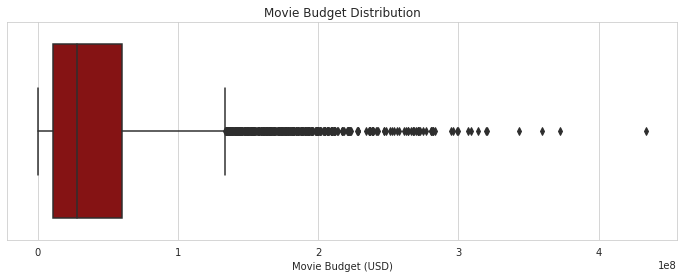

In [30]:
# plot budget quartiles

sns.boxplot(movie_df['budget'], color=mp.colors(2))

plt.xlabel('Movie Budget (USD)')
plt.title('Movie Budget Distribution');

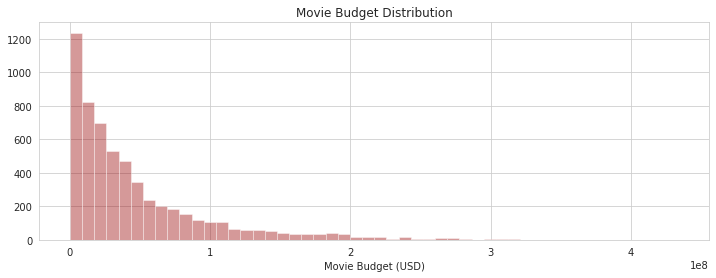

In [31]:
# plot budget distribution

sns.distplot(movie_df['budget'], bins=50, color=mp.colors(2), axlabel='Movie Budget (USD)', kde=False)

plt.title('Movie Budget Distribution');

The high budget movies are pulling the distribution far above the median value.<br>
Since this project has a return on investment focus, it is important to include these outliers to see if high budgets are correlated to high returns.

> **RELEASE DATE**

In [32]:
# observe quartiles and outliers
movie_df['release_date'].describe()

count                    5767
unique                   4172
top       2012-09-07 00:00:00
freq                        7
first     1913-11-24 00:00:00
last      2020-03-16 00:00:00
Name: release_date, dtype: object

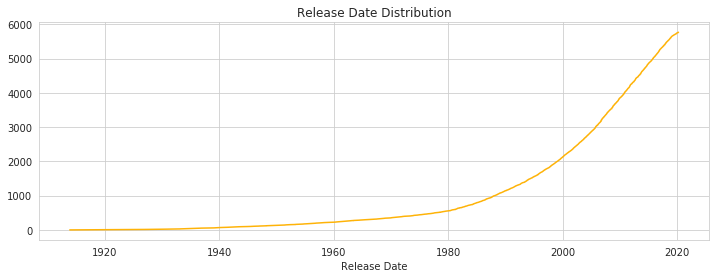

In [33]:
# plot release date distribution

sns.lineplot(x=movie_df['release_date'], y=np.linspace(0, len(movie_df['release_date']), 
                                                       num=len(movie_df['release_date'])), color=mp.colors(3))

plt.xlabel('Release Date')
plt.title('Release Date Distribution');

The release dates are fairly continuous. I'm not concerned with the sparsity of samples from the earliest years.

> **REVENUE**

In [34]:
# observe quartiles and outliers
movie_df['revenue'].describe()

count    5.767000e+03
mean     1.443947e+08
std      2.832705e+08
min      1.238841e+00
25%      1.144973e+07
50%      5.215879e+07
75%      1.581793e+08
max      7.377968e+09
Name: revenue, dtype: float64

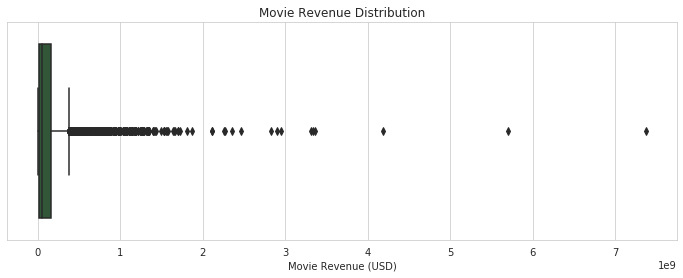

In [35]:
# plot revenue quartiles

sns.boxplot(movie_df['revenue'], color=mp.colors(4), )

plt.xlabel('Movie Revenue (USD)')
plt.title('Movie Revenue Distribution');

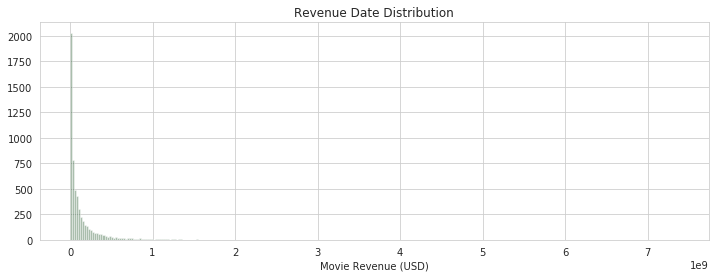

In [36]:
# plot revenue distribution

sns.distplot(movie_df['revenue'], bins=300, color=mp.colors(4), 
             axlabel='Movie Revenue (USD)', kde=False)

plt.title('Revenue Date Distribution');

In [37]:
# observe top revenues
movie_df.sort_values('revenue', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
66,7.374714e+07,"[Drama, Romance, War]",770,1939-12-15,7.377968e+09,233.0,Gone with the Wind,7.9,2207.0,"[{'cast_id': 10, 'character': 'Scarlett O'Hara..."
146,2.989749e+07,"[Animation, Family, Fantasy, Adventure]",12092,1951-07-28,5.700455e+09,75.0,Alice in Wonderland,7.1,3949.0,"[{'cast_id': 21, 'character': 'Alice (voice)',..."
86,1.342198e+07,"[Animation, Drama, Family]",3170,1942-08-14,4.183765e+09,70.0,Bambi,7.0,3691.0,"[{'cast_id': 9, 'character': 'Young Bambi (voi..."
55,2.705523e+07,"[Fantasy, Animation, Family]",408,1938-01-01,3.361411e+09,83.0,Snow White and the Seven Dwarfs,7.1,4976.0,"[{'cast_id': 14, 'character': 'Snow White (voi..."
3844,2.832764e+08,"[Action, Adventure, Fantasy, Science Fiction]",19995,2009-12-10,3.332341e+09,162.0,Avatar,7.4,21157.0,"[{'cast_id': 242, 'character': 'Jake Sully', '..."


I can believe that these values are true. This is the type of distinction I am trying to capture.

> **RUNTIME**

In [38]:
# observe quartiles and outliers
movie_df['runtime'].describe()

count    5767.000000
mean      108.537368
std        20.417757
min        70.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

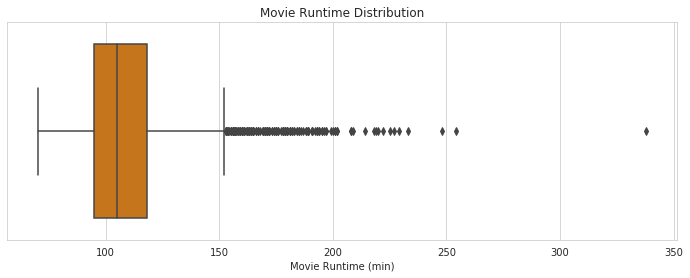

In [39]:
# plot runtime quartiles

sns.boxplot(movie_df['runtime'], color=mp.colors(5))

plt.xlabel('Movie Runtime (min)')
plt.title('Movie Runtime Distribution');

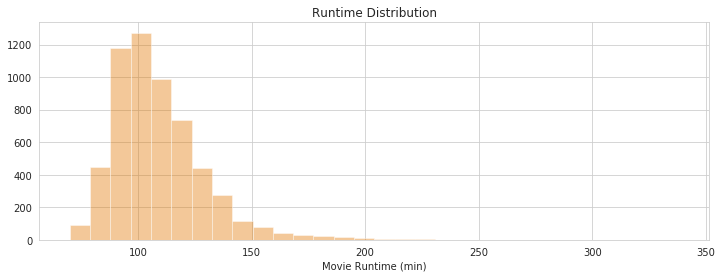

In [40]:
# plot runtime distribution

sns.distplot(movie_df['runtime'], bins=30, color=mp.colors(5), 
             axlabel='Movie Runtime (min)', kde=False)

plt.title('Runtime Distribution');

In [41]:
# observe the long running movies
movie_df.sort_values('runtime', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast
4001,2.124296e+07,"[Crime, Drama, Thriller, History]",43434,2010-10-11,1.028253e+06,338.0,Carlos,7.0,104.0,"[{'cast_id': 4, 'character': 'Ilich Ramírez Sá..."
1447,4.428878e+07,"[Drama, History, War]",10655,1993-10-08,2.249870e+07,254.0,Gettysburg,6.9,158.0,"[{'cast_id': 1, 'character': 'Col. Joshua Cham..."
275,2.624591e+08,"[Drama, History, Romance]",8095,1963-06-12,5.988943e+08,248.0,Cleopatra,7.0,339.0,"[{'cast_id': 2, 'character': 'Cleopatra', 'cre..."
66,7.374714e+07,"[Drama, Romance, War]",770,1939-12-15,7.377968e+09,233.0,Gone with the Wind,7.9,2207.0,"[{'cast_id': 10, 'character': 'Scarlett O'Hara..."
756,4.992553e+07,"[Drama, Crime]",311,1984-05-23,1.323027e+07,229.0,Once Upon a Time in America,8.4,2897.0,"[{'cast_id': 3, 'character': 'David 'Noodles' ..."


The movie Carlos is a significant outlier, but it is a real movie. I will leave these movies in the dataset.

> **ROI**

I will be replacing the budget and revenue numbers with a Return on Investment value for the movie studio.<br>
There is more than one way to express this. This is how I will define it.

$$ROI = \frac{REVENUE - BUDGET}{BUDGET}$$

This is a very simple view and doesn't take into account how the money actually flows through the differnt hands that touch a movie.<br>
There are cuts taken out for distributors, exhibitors, retailers, and sales groups, as well as actor and director shares of the producer profits.<br>
While these factors complicate the meaning of Return on Investment, they are not important in the context of this project.<br>
I am not trying to extract true numbers for ROI, only using it to extract meaningful relationships between actors and movies.<br>
It is only important to have a ratio that can be analyzed for making comparisions between actors.<br>
Any multiplying factors or constants used to modify this relationship merely scales or shifts the data.<br>
It does not distort the comparison between the value of actors to a movie's profit.

In [42]:
# combine both monetary columns to get ROI
movie_df['roi'] = np.subtract(movie_df['revenue'], movie_df['budget']).divide(movie_df['budget'], axis='index')
movie_df[['budget', 'revenue', 'roi']].head()

,budget,revenue,roi
0,1.456689e+05,4.600069e+07,314.789474
1,2.581150e+06,2.839265e+08,109.000000
2,1.952082e+08,9.301441e+07,-0.523512
3,2.284204e+07,3.175043e+07,0.390000
4,4.450259e+06,1.780103e+08,39.000000


This new variable gives a break-even value of 0.<br>
For positive values, this gives the return on investment as a multiple of investment dollars seen as profit.<br>
I would like to have this same multiplicative representation for the negative values.<br>
As it is now, the negative values represent the fraction of the budget seen as a loss.<br>
I can make this transformation by multiplying them by the ratio of the budget to revenue.<br>
This swaps out the denominator from the ROI definition, and the Loss on Investment is:

$$LOI = \frac{REVENUE - BUDGET}{REVENUE}$$

In [43]:
# change fraction of budget loss to multiples of loss on investment
movie_df.loc[movie_df.loc[movie_df['roi'] < 0].index, 'roi'] = np.divide(np.multiply(
    movie_df.loc[movie_df.loc[movie_df['roi'] < 0].index, 'roi'], 
    movie_df.loc[movie_df.loc[movie_df['roi'] < 0].index, 'budget']), 
    movie_df.loc[movie_df.loc[movie_df['roi'] < 0].index, 'revenue'])
movie_df[['budget', 'revenue', 'roi']].head()

,budget,revenue,roi
0,1.456689e+05,4.600069e+07,314.789474
1,2.581150e+06,2.839265e+08,109.000000
2,1.952082e+08,9.301441e+07,-1.098688
3,2.284204e+07,3.175043e+07,0.390000
4,4.450259e+06,1.780103e+08,39.000000


A negative value for the ROI feature implies that it is a Loss on Investment value.

Later, when I make these into actor ROIs, a profitable actor appearance will be weighted the same as one where there was a loss.

In [44]:
# observe quartiles and outliers
movie_df['roi'].describe()

count     5767.000000
mean        -6.155770
std        290.547265
min     -14136.606032
25%         -0.264629
50%          1.007390
75%          3.164213
max      12889.386667
Name: roi, dtype: float64

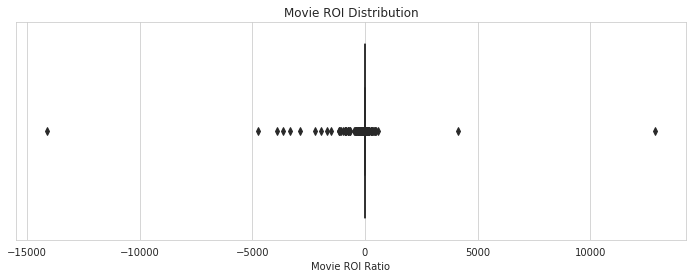

In [45]:
# plot ROI quartiles

sns.boxplot(movie_df['roi'], color=mp.colors(4))

plt.xlabel('Movie ROI Ratio')
plt.title('Movie ROI Distribution');

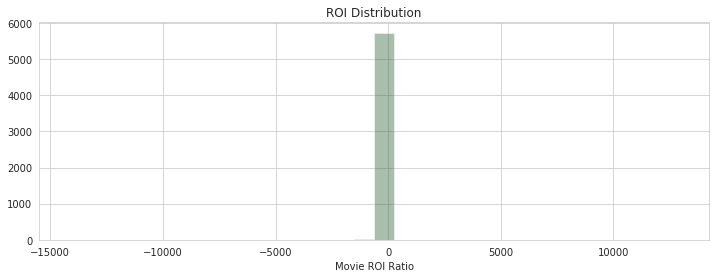

In [46]:
# plot full ROI distribution

sns.distplot(movie_df['roi'], bins=30, color=mp.colors(4), 
             axlabel='Movie ROI Ratio', kde=False)

plt.title('ROI Distribution');

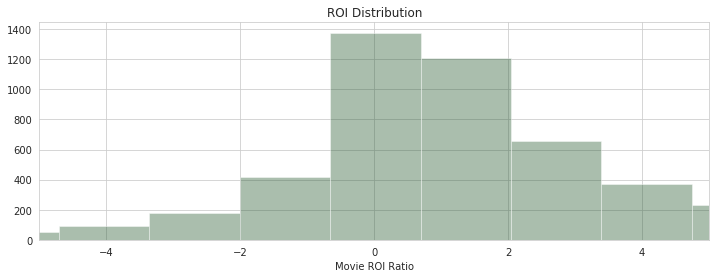

In [47]:
# plot ROI distribution near zero

plt.xlim(-5, 5)

sns.distplot(movie_df['roi'], bins=20000, color=mp.colors(4), 
             axlabel='Movie ROI Ratio', kde=False)

plt.title('ROI Distribution');

In [48]:
# observe percentage of movies that made a profit
np.sum(movie_df['roi'] > 0) / len(movie_df['roi']) * 100

69.8109935841859

From what I've read, this is a little optimistic, as it's closer to 50%.<br>
This is a fair estimate, though, considering I am not including any post-release costs.

In [49]:
# observe movies with largest proportional gain
movie_df.sort_values('roi', ascending=False)[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
3795,17927.225667,"[Horror, Mystery]",23827,2009-09-25,2.310889e+08,86.0,Paranormal Activity,5.9,3276.0,"[{'cast_id': 3, 'character': 'Katie', 'credit_...",12889.386667
2057,92902.819436,"[Horror, Mystery]",2667,1999-07-14,3.839983e+08,81.0,The Blair Witch Project,6.3,2713.0,"[{'cast_id': 5, 'character': 'Heather', 'credi...",4132.333333
446,292758.034026,"[Drama, Romance]",47178,1975-04-29,1.707755e+08,88.0,"Aloha, Bobby and Rose",6.1,7.0,"[{'cast_id': 0, 'character': 'Bobby Eckert', '...",582.333333
394,74815.942029,"[Comedy, Crime]",692,1972-03-12,3.740797e+07,92.0,Pink Flamingos,6.5,247.0,"[{'cast_id': 8, 'character': 'Divine / Babs Jo...",499.000000
2710,90591.117711,"[Documentary, Comedy, Drama]",9372,2004-01-17,3.982536e+07,100.0,Super Size Me,6.7,1044.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...",438.616585


Seeing Paranormal Activity and The Blair Witch Project as the huge outliers gives me confidence that this variable will be useful.

I want to check some movies that I know should have a high ROI.

In [50]:
movie_df[movie_df['title'] == 'Mad Max']

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
537,1.462408e+06,"[Adventure, Action, Thriller, Science Fiction]",9659,1979-04-12,3.656020e+08,91.0,Mad Max,6.7,2547.0,"[{'cast_id': 1, 'character': 'Max Rockatansky'...",249.0


In [51]:
movie_df[movie_df['title'] == 'Rocky']

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
476,4.450259e+06,[Drama],1366,1976-11-21,5.217267e+08,119.0,Rocky,7.7,4574.0,"[{'cast_id': 16, 'character': 'Robert ""Rocky"" ...",116.235147


Now, I'll show the movies that really bombed.

In [52]:
# observe movies with largest proprtional loss
movie_df.sort_values('roi')[:5]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
4478,1.663305e+07,"[Action, Crime, Drama, Thriller]",174645,2013-03-06,1176.511086,104.0,Java Heat,5.4,49.0,"[{'cast_id': 4, 'character': 'Jake Travers', '...",-14136.606032
4289,1.350256e+07,[Thriller],98339,2012-03-02,2836.663506,90.0,The Samaritan,5.5,126.0,"[{'cast_id': 1, 'character': 'Foley', 'credit_...",-4759.015867
4636,2.768892e+07,"[Fantasy, Adventure, Family]",227707,2013-12-05,7087.255835,99.0,The Adventurer: The Curse of the Midas Box,5.3,127.0,"[{'cast_id': 1, 'character': 'Mariah Mundi', '...",-3905.860447
5351,2.972588e+07,"[Thriller, Action, Mystery]",404733,2017-06-29,8211.672328,93.0,Overdrive,6.1,602.0,"[{'cast_id': 1, 'character': 'Andrew Foster', ...",-3618.954190
2620,8.430539e+06,"[Drama, Romance]",17473,2003-06-27,2529.161677,99.0,The Room,4.0,880.0,"[{'cast_id': 1, 'character': 'Johnny', 'credit...",-3332.333333


I recognize The Room as a big box office bomb.

> **MOVIE ID & TITLE**

The TMDb IDs and titles are being kept to reference movies.<br>
They will help with heuristic model evaluation based on my knowledge of movies and information about them on the internet.

In [53]:
# verifying unique IDs
movie_df['movie_id'].is_unique

True

While I wouldn't expect to have unique movie titles, it is good to have unique IDs.

> **VOTE AVERAGE**

In [54]:
# observe quartiles and outliers
movie_df['vote_average'].describe()

count    5767.000000
mean        6.413612
std         0.976878
min         1.000000
25%         5.900000
50%         6.400000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

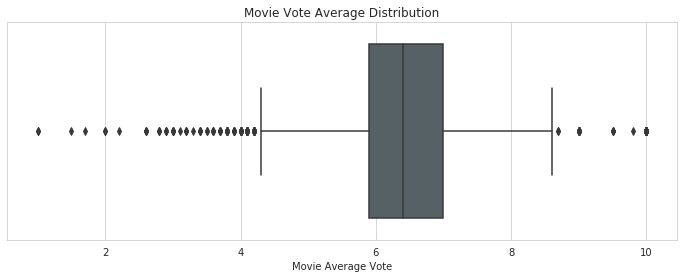

In [55]:
# plot vote average quartiles

sns.boxplot(movie_df['vote_average'], color=mp.colors(6))

plt.xlabel('Movie Average Vote')
plt.title('Movie Vote Average Distribution');

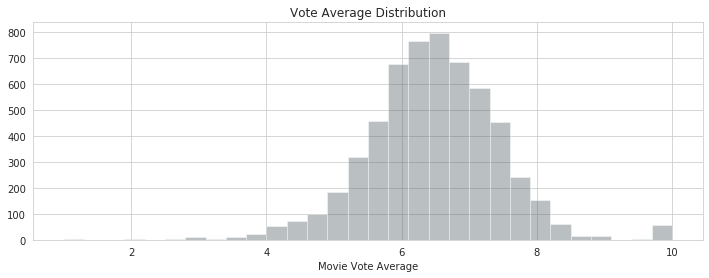

In [56]:
# plot vote average distribution

sns.distplot(movie_df['vote_average'], bins=30, color=mp.colors(6), 
             axlabel='Movie Vote Average', kde=False)

plt.title('Vote Average Distribution');

The vote average leans toward a favorable rating.

In [57]:
# checking on the 10's
movie_df.loc[movie_df['vote_average'] == 10]['vote_count']

166     1.0
647     1.0
3851    1.0
4033    1.0
4402    1.0
4480    1.0
4504    1.0
4673    1.0
4893    1.0
4934    1.0
5020    1.0
5038    1.0
5082    1.0
5090    1.0
5091    1.0
5097    1.0
5125    1.0
5129    1.0
5165    1.0
5169    1.0
5194    1.0
5196    1.0
5224    1.0
5249    1.0
5251    1.0
5271    1.0
5289    1.0
5290    1.0
5297    1.0
5346    1.0
5387    1.0
5400    1.0
5426    2.0
5427    1.0
5445    1.0
5451    1.0
5452    1.0
5465    1.0
5492    1.0
5495    1.0
5499    1.0
5511    1.0
5519    1.0
5520    1.0
5550    1.0
5563    1.0
5580    1.0
5590    1.0
5600    1.0
5614    1.0
5626    1.0
5631    1.0
5659    1.0
5660    1.0
5672    1.0
5766    1.0
Name: vote_count, dtype: float64

The movies with averages of 10 only have one vote each.<br>
This feature looks clean.

> **VOTE COUNT**

In [58]:
# observe quartiles and outliers
movie_df['vote_count'].describe()

count     5767.000000
mean      1551.320444
std       2559.425814
min          1.000000
25%        155.500000
50%        597.000000
75%       1772.000000
max      25603.000000
Name: vote_count, dtype: float64

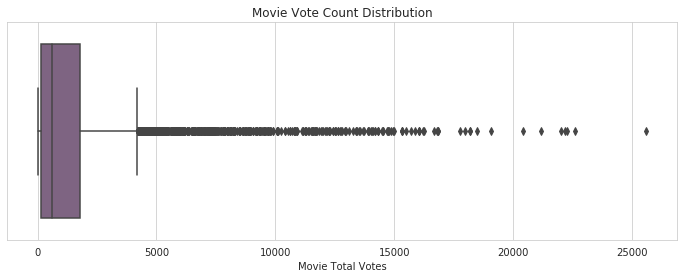

In [59]:
# plot vote count quartiles

sns.boxplot(movie_df['vote_count'], color=mp.colors(1))

plt.xlabel('Movie Total Votes')
plt.title('Movie Vote Count Distribution');

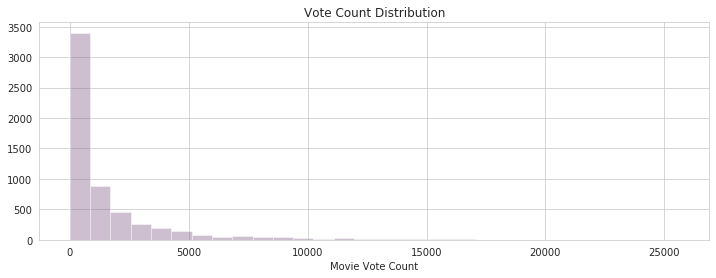

In [60]:
# plot vote count distribution

sns.distplot(movie_df['vote_count'], bins=30, color=mp.colors(1), 
             axlabel='Movie Vote Count', kde=False)

plt.title('Vote Count Distribution');

In [61]:
# observe high vote count outlier
movie_df.loc[movie_df['vote_count'] == movie_df['vote_count'].max()]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi
3942,1.894326e+08,"[Action, Science Fiction, Adventure]",27205,2010-07-15,9.773928e+08,148.0,Inception,8.3,25603.0,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...",4.15958


That looks right to me.

> **VOTE WEIGHTED**

I want to assign weighted vote scores to the movies. Movies with low number of vote counts will be assigned closer to the average of all movies.

$$VoteWeighted = wR + (1 - w)C$$

where $$w = \frac{Vote Count(Movie)}{Vote Count(Movie) + Vote Count(All Movies)}$$<br>
R is the vote average for a movie, and C is the vote average for all movies.

In [62]:
# create true Bayesian average function
M = np.mean(movie_df['vote_count']) # average vote count for all movies
C = np.mean(movie_df['vote_average']) # vote average for all movies
def weight_votes(data):
    """Returns a true Bayesian average vote from total and average votes of individual movies and all movies."""
    # calculate weight to apply to vote score
    weight = data['vote_count'] / (data['vote_count'] + M)
    # create new weighted vote score
    weighted_vote = weight * data['vote_average'] + (1 - weight) * C
    
    return weighted_vote

In [63]:
# create weighted vote feature
movie_df['vote_weighted'] = weight_votes(movie_df)
movie_df.iloc[np.r_[0:3, -3:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi,vote_weighted
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '...",314.789474,6.407367
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'...",109.000000,6.396399
2,1.952082e+08,"[Drama, History]",3059,1916-09-04,9.301441e+07,197.0,Intolerance: Love's Struggle Throughout the Ages,7.5,157.0,"[{'cast_id': 23, 'character': 'The Woman Who R...",-1.098688,6.513454
5764,4.200000e+07,"[Action, Science Fiction]",338762,2020-03-05,2.457362e+07,110.0,Bloodshot,7.1,2076.0,"[{'cast_id': 51, 'character': 'Ray Garrison / ...",-0.709150,6.806448
5765,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred...",-1.149712,6.522279
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'...",0.789630,6.415922


In [64]:
# observe quartiles and outliers
movie_df['vote_weighted'].describe()

count    5767.000000
mean        6.490421
std         0.362946
min         4.766034
25%         6.328223
50%         6.412548
75%         6.563497
max         8.498199
Name: vote_weighted, dtype: float64

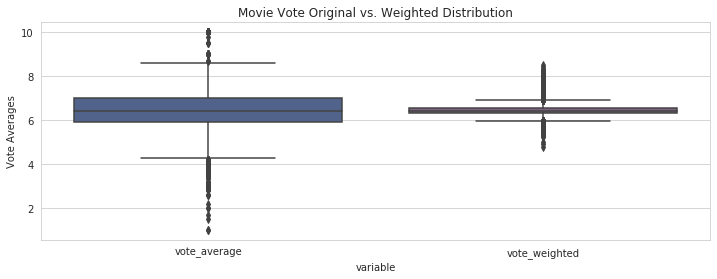

In [65]:
# plot vote weighted quartiles vs. original

sns.boxplot(x="variable", y="value", data=pd.melt(movie_df[['vote_average', 'vote_weighted']]))

plt.ylabel('Vote Averages')
plt.title('Movie Vote Original vs. Weighted Distribution');

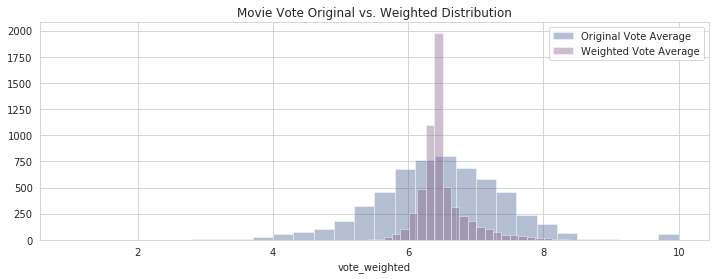

In [66]:
# plot original vs. weighted vote distribution

sns.distplot(movie_df['vote_average'], bins=30, color=mp.colors(0), 
             label='Original Vote Average', kde=False)
sns.distplot(movie_df['vote_weighted'], bins=30, color=mp.colors(1), 
             label='Weighted Vote Average', kde=False)

plt.legend()
plt.title('Movie Vote Original vs. Weighted Distribution');

The weighting function has centered the large number of low vote count movies.

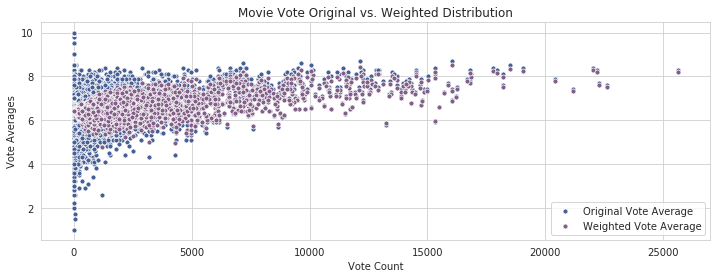

In [67]:
# plot original vs. weighted vote distribution

sns.scatterplot(data=movie_df, x='vote_count',  y='vote_average', label='Original Vote Average', 
                color=mp.colors(0), s=25)
sns.scatterplot(data=movie_df, x='vote_count',  y='vote_weighted', label='Weighted Vote Average', 
                color=mp.colors(1), s=25)

plt.xlabel('Vote Count')
plt.ylabel('Vote Averages')

plt.legend(loc=4)
plt.title('Movie Vote Original vs. Weighted Distribution');

The movies with small vote counts were the ones with wide ranging average vote scores.<br>
Movies with the most number of votes had some of the highest scores after the weighting was applied.<br>
Movies with vote counts that were at least as large as the average vote counts for all movies had scores between 4 and 8.5, except one.<br>
I will find out which movie has over 1,000 votes, but still had an average score below 3.

In [68]:
# find bomb of gereral consent
movie_df[(movie_df['vote_count'] > 1000) & (movie_df['vote_average'] < 3)]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,roi,vote_weighted
3687,1.213465e+08,"[Action, Adventure, Fantasy, Science Fiction, ...",14164,2009-03-12,6.977147e+07,85.0,Dragonball Evolution,2.6,1180.0,"[{'cast_id': 1, 'character': 'Goku', 'credit_i...",-0.7392,4.766034


As one critic put it, "Dragonball has been perfectly designed to blow the mind of a 10-year-old boy." 'nuff said

> **GENRES**

The 19 unique TMDb genre categories are grouped together into lists of genre combinations.<br>
One possible way to observe these combinations is to treat them as unique genres, themselves.<br>
This significantly increases the dimensionality of the data.<br>
I'll investigate this possibility.

I want to get a count of unique genre combinations.<br>
I needed to convert the column of lists to a Series of tuples to avoid an unhashable type error.

In [69]:
# put unique genres lists into Series
unique_genres_count = movie_df['genres'].apply(tuple).value_counts()

In [70]:
# observe Series
unique_genres_count

(Drama,)                                                   358
(Comedy,)                                                  310
(Drama, Romance)                                           194
(Comedy, Drama)                                            152
(Comedy, Romance)                                          152
                                                          ... 
(Comedy, Romance, Science Fiction, Drama)                    1
(Animation, Action)                                          1
(Family, Animation, Adventure, Comedy, Fantasy, Action)      1
(Animation, Comedy, Family, Science Fiction)                 1
(Drama, Family, Fantasy)                                     1
Name: genres, Length: 1392, dtype: int64

Note that the genres are the keys of this Series.

In [71]:
# count unique combinations of genres
len(unique_genres_count)

1392

I want to make the unique genre combinations features, but there are a lot of them.<br>
I will look at their distribution.

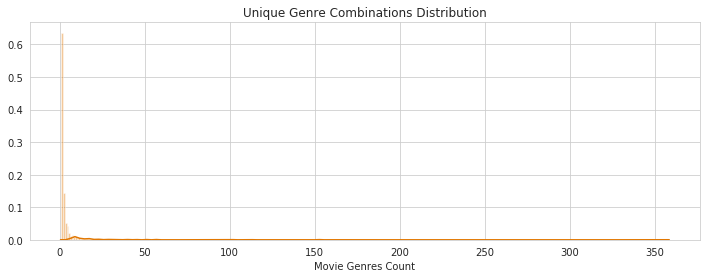

In [72]:
# plot genres distribution

sns.distplot(unique_genres_count, bins=360, color=mp.colors(5), axlabel='Movie Genres Count')

plt.title('Unique Genre Combinations Distribution');

I want to isolate where the distribution flattens out to bin unique genre combinations with few entries together.

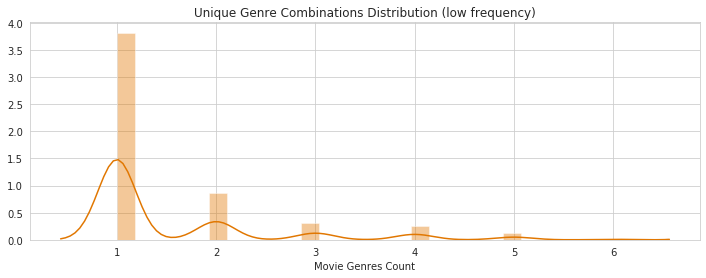

In [73]:
# plot genres distribution for low count of movies

sns.distplot(unique_genres_count[150:], color=mp.colors(5), axlabel='Movie Genres Count')

plt.title('Unique Genre Combinations Distribution (low frequency)');

In [74]:
# look for where genre combinations drop to individual movies
unique_genres_count[510:]

(History,)                                                 2
(Science Fiction, Adventure, Action)                       2
(Drama, Thriller, Crime, Romance)                          2
(Adventure, Drama, Western)                                2
(Romance, Horror)                                          1
                                                          ..
(Comedy, Romance, Science Fiction, Drama)                  1
(Animation, Action)                                        1
(Family, Animation, Adventure, Comedy, Fantasy, Action)    1
(Animation, Comedy, Family, Science Fiction)               1
(Drama, Family, Fantasy)                                   1
Name: genres, Length: 882, dtype: int64

The counts drop down to one observation per genre combination at index 513.

In [75]:
# observe percentage of movies that are the only observation of their genre combination
unique_genres_count[513:].sum() / len(movie_df['genres'])

0.15259233570313854

Binning all of these movies together would reduce the dataset by 15%.<br>
I would have 512 unique move genre combinations plus one miscellaneous genre.

In [76]:
# isolate movies that are the only observation of their genre combination and put them in nested list
one_movie_genres = [list(x) for x in list(unique_genres_count[unique_genres_count == 1].index)]
one_movie_genres[:3]

[['Romance', 'Horror'],
 ['Mystery', 'Horror', 'Drama', 'Documentary'],
 ['Fantasy', 'Drama', 'Horror']]

In [77]:
# count the number of movies that will be grouped together
len(one_movie_genres)

878

This is how many observations would lose their unique effect by binning them together.<br>
I am not ready to drop these movies, quite yet.

A second way to use the genre combination lists is to divide them into the general TMDb genres that they contain.<br>
If a movie has elements of more than one base genre, it will be counted as belonging to both groups.<br>
I can aggregate this information by actor to get counts of base genres for all their movies.

In [78]:
# instantiate MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [79]:
# binarize genres labels
binary_genres = mlb.fit_transform(movie_df['genres'])
binary_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [80]:
# observe new column names
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'], dtype=object)

In [81]:
# create a DataFrame from the binarizeded array
binary_genres_df = pd.DataFrame(binary_genres, columns=mlb.classes_)
binary_genres_df.iloc[np.r_[0:3, -3:0]]

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5764,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5765,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5766,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [82]:
# observe memory size of genres in original form
movie_df['genres'].memory_usage()

256112

In [83]:
# observe memory size of genres in new form
binary_genres_df.memory_usage().sum()

876712

In [84]:
# join two DataFrames
movie_df = movie_df.join(binary_genres_df)
movie_df.iloc[np.r_[0:2, -2:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,cast,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,"[{'cast_id': 10, 'character': 'Mary Barton', '...",...,0,0,0,0,0,0,0,0,0,0
1,2.581150e+06,"[Drama, History, War]",618,1915-02-08,2.839265e+08,193.0,The Birth of a Nation,6.3,277.0,"[{'cast_id': 16, 'character': 'Elsie Stoneman'...",...,1,0,0,0,0,0,0,0,1,0
5765,1.400000e+07,"[Action, Thriller, Horror]",514847,2020-03-11,6.512500e+06,90.0,The Hunt,6.8,607.0,"[{'cast_id': 29, 'character': 'Crystal', 'cred...",...,0,1,0,0,0,0,0,1,0,0
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,"[{'cast_id': 2, 'character': 'Sebastian Spade'...",...,0,0,0,1,0,0,0,1,0,0


In [85]:
# make column names lowercase and remove white spaces
movie_df.columns = movie_df.columns.str.lower().str.replace(' ', '_')
movie_df.columns

Index(['budget', 'genres', 'movie_id', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'cast', 'roi', 'vote_weighted',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery',
       'romance', 'science_fiction', 'tv_movie', 'thriller', 'war', 'western'],
      dtype='object')

> **CAST**

In [86]:
# observe general form of cast lists
movie_df['cast']

0       [{'cast_id': 10, 'character': 'Mary Barton', '...
1       [{'cast_id': 16, 'character': 'Elsie Stoneman'...
2       [{'cast_id': 23, 'character': 'The Woman Who R...
3       [{'cast_id': 3, 'character': 'Anitia', 'credit...
4       [{'cast_id': 1, 'character': 'Prince Daaker's ...
                              ...                        
5762    [{'cast_id': 0, 'character': 'Himself', 'credi...
5763    [{'cast_id': 7, 'character': 'Cecilia Kass', '...
5764    [{'cast_id': 51, 'character': 'Ray Garrison / ...
5765    [{'cast_id': 29, 'character': 'Crystal', 'cred...
5766    [{'cast_id': 2, 'character': 'Sebastian Spade'...
Name: cast, Length: 5767, dtype: object

In [87]:
# observe top five billing from one movie
movie_df['cast'][5501][:5]

[{'cast_id': 6,
  'character': 'Ted Kennedy',
  'credit_id': '586c361fc3a368038c000de8',
  'gender': 2,
  'id': 76512,
  'name': 'Jason Clarke',
  'order': 0,
  'profile_path': '/quH4y2dto3UAgZOfaM0QriyRLPN.jpg'},
 {'cast_id': 3,
  'character': 'Mary Jo Kopechne',
  'credit_id': '586c35ec925141087e000d5b',
  'gender': 1,
  'id': 51072,
  'name': 'Kate Mara',
  'order': 1,
  'profile_path': '/xZYD8wYHMmN9dMMPiohnKEFoTGx.jpg'},
 {'cast_id': 4,
  'character': 'Joe Gargan',
  'credit_id': '586c35f9c3a368037e000db5',
  'gender': 2,
  'id': 27105,
  'name': 'Ed Helms',
  'order': 2,
  'profile_path': '/Atxrr9p8cOGp0U8qIG69GtLWJ5W.jpg'},
 {'cast_id': 5,
  'character': 'Joe Kennedy',
  'credit_id': '586c3606c3a3680386000e71',
  'gender': 2,
  'id': 6905,
  'name': 'Bruce Dern',
  'order': 3,
  'profile_path': '/lumA2Tb4YAfClkCRDCR0YrDimmF.jpg'},
 {'cast_id': 9,
  'character': 'Ted Sorensen',
  'credit_id': '586c365e9251410878000e47',
  'gender': 2,
  'id': 4944,
  'name': 'Taylor Nichols',
  '

The lists hold one dict for each actor. The number of actors varies between movies.

In [88]:
# check for duplicate rows
movie_df.drop(['genres', 'cast'], axis=1).duplicated().sum()

0

In [89]:
# create DataFarme with cast members expanded into their own rows and duplicate indices which match the movies
cast_members_df = movie_df.drop(columns=['cast']).join(movie_df['cast'].explode().to_frame())
cast_members_df.iloc[np.r_[0:3, -3:0]]

,budget,genres,movie_id,release_date,revenue,runtime,title,vote_average,vote_count,roi,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,cast
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,314.789474,...,0,0,0,0,0,0,0,0,0,"{'cast_id': 10, 'character': 'Mary Barton', 'c..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,314.789474,...,0,0,0,0,0,0,0,0,0,"{'cast_id': 3, 'character': 'Lorna Barton', 'c..."
0,1.456689e+05,"[Drama, Crime]",96128,1913-11-24,4.600069e+07,88.0,Traffic in Souls,5.6,12.0,314.789474,...,0,0,0,0,0,0,0,0,0,"{'cast_id': 4, 'character': 'Mary's father', '..."
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,0.789630,...,0,0,1,0,0,0,1,0,0,"{'cast_id': 15, 'character': 'Himself', 'credi..."
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,0.789630,...,0,0,1,0,0,0,1,0,0,"{'cast_id': 13, 'character': 'Sailor #1', 'cre..."
5766,2.700000e+07,"[Mystery, Action, Crime, Drama, Thriller]",686704,2020-03-16,4.832000e+07,115.0,Scarlet Tulips,10.0,1.0,0.789630,...,0,0,1,0,0,0,1,0,0,"{'cast_id': 14, 'character': 'Sailor #2', 'cre..."


In [90]:
# expand dicts of cast column as their own DataFrame
cast_normalized_df = pd.json_normalize(cast_members_df['cast'])
cast_normalized_df

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,10,Mary Barton,5e2b57a9532acb0019515e07,1,105945,Jane Gail,0,/pFmtBjoHCK1JRhBNfTeyRcLSYSW.jpg
1,3,Lorna Barton,52fe49a29251416c750ce52b,1,1070243,Ethel Grandin,1,/bPGgdb4cGLjxH78wrXnAUUKx3q7.jpg
2,4,Mary's father,5bb6ff690e0a2633a701f416,0,1405084,William H. Turner,2,/6uGbk83pJpeUgQf5XTPPkVikIF6.jpg
3,5,Burke,5bb6ffec0e0a26339702019f,2,61101,Matt Moore,3,/oj7AI3ecCjOXbysuluioNsEUrhq.jpg
4,6,Alice Trubus,5bb70008c3a368151002400f,0,2142031,Irene Wallace,4,None
...,...,...,...,...,...,...,...,...
171382,3,Quentin Sharpe,5e7ce47bd861af2f0ab80f00,2,2550091,Charlie R. Knibb,1,/wbWEKnnTxaIerDO8T4fpZ0UpNbt.jpg
171383,1,Sarah Kelly,5e7ce405109dec1ebb024e64,1,2550092,Emma Coe,2,/mTBfqpqCjs7FVZVCtGKW6QbHfrq.jpg
171384,15,Himself,5e7ce699ab1bc75cb1c2a410,2,2562896,Bobby Seagull,3,/6ZDIf5Sqk0CP9kTnf6gguduUG6S.jpg
171385,13,Sailor #1,5e7ce67bd861af312ab84612,0,2562894,Patrick Knibb,4,/kx0crEX2iuXUfosqvwXj4TeseZl.jpg


In [91]:
# rename actor id to avoid confusion
cast_normalized_df.rename(columns={'id': 'person_id'}, inplace=True)

In [92]:
# drop columns not needed
cast_normalized_df.drop(['cast_id', 'character', 'credit_id', 'gender', 'name', 'profile_path'], 
                        axis=1, inplace=True)
cast_normalized_df

,person_id,order
0,105945,0
1,1070243,1
2,1405084,2
3,61101,3
4,2142031,4
...,...,...
171382,2550091,1
171383,2550092,2
171384,2562896,3
171385,2562894,4


The order feature represents the billing order for each movie with top billing having a value of zero.

In [93]:
# reset the index to merge on normalized DataFrame
cast_members_df.reset_index(drop=True, inplace=True)

In [94]:
# observe features of new movie DataFrame
cast_members_df.columns

Index(['budget', 'genres', 'movie_id', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'roi', 'vote_weighted', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'tv_movie', 'thriller', 'war', 'western', 'cast'],
      dtype='object')

In [95]:
# drop columns not needed
cast_members_df.drop(['budget', 'genres', 'revenue', 'title', 'vote_average', 'vote_count', 'cast'], 
                     axis=1, inplace=True)
cast_members_df.iloc[np.r_[0:2, -2:0]]

,movie_id,release_date,runtime,roi,vote_weighted,action,adventure,animation,comedy,crime,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
0,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171385,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
171386,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [96]:
# join DataFrames on index
cast_members_df = cast_members_df.join(cast_normalized_df)
cast_members_df

,movie_id,release_date,runtime,roi,vote_weighted,action,adventure,animation,comedy,crime,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,person_id,order
0,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,105945,0
1,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1070243,1
2,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1405084,2
3,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,61101,3
4,96128,1913-11-24,88.0,314.789474,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2142031,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171382,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2550091,1
171383,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2550092,2
171384,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2562896,3
171385,686704,2020-03-16,115.0,0.789630,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2562894,4


In [97]:
# check for duplicate actors in a movie
cast_members_df.duplicated(subset=['person_id', 'movie_id']).sum()

209

I did some sleuthing on this. There are people with double credits in some movies. I will remove the duplicates.

In [98]:
# drop double credits
cast_members_df.drop_duplicates(subset=['person_id', 'movie_id'], inplace=True)

Concerning the billing order values, I want to absorb them into the return on investment values.<br>
This will give a weighted ROI to each actor for each movie.<br>
The results will be to assign a greater portion of ROI values to the top of a billing than to those with bit roles.<br>
This reduces the importance on whether an actor was simply in a movie and focuses it on how much the film is centered on that actor.<br>
A higher billing order for an actor, will assign more responsibility for the success or failure of that movie.

I will heuristically choose a transform function to get the type of weighting I believe reflects the importance of a billing spot in a movie.<br>
The function should be a maximum at the first billing, which is the starring role.<br>
It should asymtopically decay to zero, as the billing order increases.<br>
Choosing the maximum scale = 1 will result in billing order values scaled relative to the lead actor.<br>
I want this fractional scale to die quickly, becoming trivial past the fifth or sixth actor down the list.<br>

My weighting function is:<br>
$$f(x)=e^{(1-x)}$$ where x = 1, 2, 3, ... is the billing order in the movie.

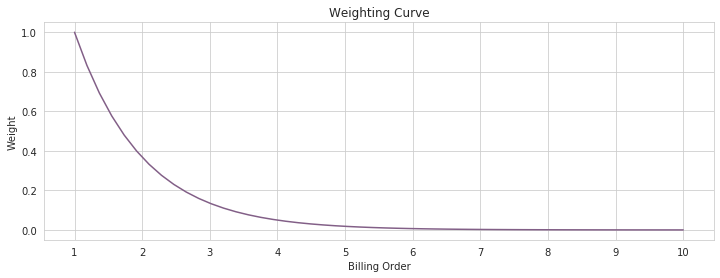

In [99]:
# plot weighting function

order = np.linspace(1, 10)

sns.lineplot(x=order, y=np.exp(1) ** (1 - order), color=mp.colors(1))

plt.xticks(np.arange(1, 11, 1))

plt.xlabel('Billing Order')
plt.ylabel('Weight')
plt.title('Weighting Curve');

In [100]:
# observe weights for billing order values where the cast has 10 actors
weights = {}
for x in range(1, 11):
    weights[x] = np.exp(1) ** (1 - x)
pd.DataFrame(weights, index=['weight'])

,1,2,3,4,5,6,7,8,9,10
weight,1.0,0.367879,0.135335,0.049787,0.018316,0.006738,0.002479,0.000912,0.000335,0.000123


This shows the proportion of the weights relative to the lead actor.<br>
The actor with second billing has about one-third of the weight as the lead actor.<br>
I will normalize this such that they will sum to 1.

In [101]:
# observe normalized weights for billing order values where the cast has 10 actors
weights = {}
total = 0
for x in range(1, 11):
    weights[x] = np.exp(1) ** (1 - x)
    # add weights
    total += weights[x]
pd.DataFrame(weights, index=['weight']).div(total)

,1,2,3,4,5,6,7,8,9,10
weight,0.632149,0.232555,0.085552,0.031473,0.011578,0.004259,0.001567,0.000576,0.000212,0.000078


Now, the weights will convert the individual ROI values to a percentage of the original ROI value of the movie.<br>
Observe that the weights drop below 2%, starting with the fifth billing order.<br>
I'll be conservative and drop actors below 10 in the billing list to filter out bit role actors, which would have been many.

In [102]:
# drop actors past 10 in billing order
cast_members_df = cast_members_df.loc[cast_members_df.loc[cast_members_df['order'] < 11].index]

Note that the encoding of the billing order in the dataset starts at zero instead of one.<br>
Since the lead actor is also called the top billing, I will adjust for this in the mapping of my function.<br>
Going from x in my equation to (x + 1) in the mapping will make this change.<br>
This has been code explicitly for clarity.

In [103]:
# loop over unique movies
for i in cast_members_df['movie_id'].unique():
    # apply weighting function to order column
    cast_members_df.loc[cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'order'] = cast_members_df.loc[
        cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'order'].map(lambda x: 
                                                                                  np.exp(1) ** (1 - (x + 1)))
    # multiply ROI column by the weights and normalize using the sum of the weights
    cast_members_df.loc[cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'roi'] = cast_members_df.loc[
        cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'roi'].mul(cast_members_df.loc[
        cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'order']).div(np.sum(cast_members_df.loc[
        cast_members_df.loc[cast_members_df['movie_id'] == i].index, 'order'].values))

In [104]:
# rename ROI column and observe new columns
cast_members_df.rename(columns={'roi': 'roi_weighted'}, inplace=True)
cast_members_df

,movie_id,release_date,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,crime,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,person_id,order
0,96128,1913-11-24,88.0,199.051672,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,105945,1.000000
1,96128,1913-11-24,88.0,73.227018,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1070243,0.367879
2,96128,1913-11-24,88.0,26.938714,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1405084,0.135335
3,96128,1913-11-24,88.0,9.910199,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,61101,0.049787
4,96128,1913-11-24,88.0,3.645759,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2142031,0.018316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171382,686704,2020-03-16,115.0,0.184080,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2550091,0.367879
171383,686704,2020-03-16,115.0,0.067719,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2550092,0.135335
171384,686704,2020-03-16,115.0,0.024913,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2562896,0.049787
171385,686704,2020-03-16,115.0,0.009165,6.415922,1,0,0,0,1,...,0,1,0,0,0,1,0,0,2562894,0.018316


In [105]:
# drop order feature
cast_members_df.drop(['order'], axis=1, inplace=True)
cast_members_df.head(3)

,movie_id,release_date,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,crime,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,person_id
0,96128,1913-11-24,88.0,199.051672,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,105945
1,96128,1913-11-24,88.0,73.227018,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1070243
2,96128,1913-11-24,88.0,26.938714,6.407367,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1405084


In [106]:
# bring person ID to front of DataFrame and sort by person
cols = list(cast_members_df)
cols.insert(0, cols.pop(cols.index('person_id')))
cast_members_df = cast_members_df.loc[:, cols].sort_values('person_id')
cast_members_df

,person_id,movie_id,release_date,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
14471,2,16220,1977-02-09,80.0,0.075256,6.418696,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
170754,2,181812,2019-12-18,142.0,0.766110,6.477478,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16634,2,1891,1980-05-20,124.0,18.275613,8.162124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
144531,2,140607,2015-12-15,136.0,1.730560,7.303641,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
20398,2,1892,1983-05-25,135.0,10.558641,7.777413,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93472,2622425,1961,2007-10-01,86.0,-0.000220,6.359417,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
171196,2623517,454626,2020-02-12,99.0,0.000061,7.243480,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15430,2623798,15867,1978-08-02,93.0,0.000003,6.466683,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15431,2623804,15867,1978-08-02,93.0,0.000001,6.466683,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset below is from the actor data. There's just a couple of features from this to tack onto the monster dataset above.

> **PERSON DATASET**

In [107]:
# read in person dataset
person_df = pd.read_json('tmdb_person_clean.json')

In [108]:
# convert birthdays to datetime objects and remove timezone-aware index
person_df['birthday'] = pd.to_datetime(person_df['birthday']).dt.tz_localize(None)
person_df.head()

,birthday,known_for_department,id,name,gender,biography,popularity,place_of_birth,imdb_id
0,1944-05-14,Directing,1,George Lucas,2.0,"George Walton Lucas Jr. (born May 14, 1944) is...",6.761,"Modesto, California, USA",nm0000184
1,1951-09-25,Acting,2,Mark Hamill,2.0,"Mark Richard Hamill (born September 25, 1951) ...",10.497,"Concord, California, USA",nm0000434
2,1942-07-13,Acting,3,Harrison Ford,2.0,Legendary Hollywood Icon Harrison Ford was bor...,20.349,"Chicago, Illinois, USA",nm0000148
3,1956-10-21,Acting,4,Carrie Fisher,1.0,Carrie Frances Fisher (21 October 1956 - 27 De...,7.228,"Beverly Hills, Los Angeles, California, USA",nm0000402
4,1913-05-26,Acting,5,Peter Cushing,2.0,"Peter Wilton Cushing, OBE (26 May 1913 – 11 A...",3.902,"Kenley, Surrey, England, UK",nm0001088


In [109]:
# count the actors
np.sum(person_df['known_for_department'] == 'Acting')

941186

In [110]:
# remove non-actors
person_df = person_df[person_df['known_for_department'] == 'Acting']
person_df.iloc[np.r_[0:2, -2:0]]

,birthday,known_for_department,id,name,gender,biography,popularity,place_of_birth,imdb_id
1,1951-09-25,Acting,2,Mark Hamill,2.0,"Mark Richard Hamill (born September 25, 1951) ...",10.497,"Concord, California, USA",nm0000434
2,1942-07-13,Acting,3,Harrison Ford,2.0,Legendary Hollywood Icon Harrison Ford was bor...,20.349,"Chicago, Illinois, USA",nm0000148
2699993,NaT,Acting,2618069,Gérard Krause,NaN,,0.600,None,
2699996,NaT,Acting,2618072,Emmanuel Camacho,NaN,,0.600,None,


In [111]:
# drop columns that will not be used
person_df.drop(['known_for_department', 'biography', 'popularity', 'place_of_birth', 'imdb_id'], 
               axis=1, inplace=True)
person_df.iloc[np.r_[0:2, -2:0]]

,birthday,id,name,gender
1,1951-09-25,2,Mark Hamill,2.0
2,1942-07-13,3,Harrison Ford,2.0
2699993,NaT,2618069,Gérard Krause,NaN
2699996,NaT,2618072,Emmanuel Camacho,NaN


In [112]:
# rename actor id to avoid confusion
person_df.rename(columns={'id': 'person_id'}, inplace=True)
person_df.columns

Index(['birthday', 'person_id', 'name', 'gender'], dtype='object')

In [113]:
# observe person DataFrame
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941186 entries, 1 to 2699996
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   birthday   117030 non-null  datetime64[ns]
 1   person_id  941186 non-null  int64         
 2   name       941186 non-null  object        
 3   gender     186717 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.9+ MB


In [114]:
# drop rows with missing values
person_df.dropna(inplace=True)
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104162 entries, 1 to 2699990
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   birthday   104162 non-null  datetime64[ns]
 1   person_id  104162 non-null  int64         
 2   name       104162 non-null  object        
 3   gender     104162 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


In [115]:
# binary encode gender
person_df['gender'] = person_df['gender'].replace(2, 0)
person_df.iloc[np.r_[0:3, -3:0]]

,birthday,person_id,name,gender
1,1951-09-25,2,Mark Hamill,0.0
2,1942-07-13,3,Harrison Ford,0.0
3,1956-10-21,4,Carrie Fisher,1.0
2699770,1992-06-10,2617846,Tejasswi Prakash,1.0
2699989,1998-08-31,2618065,Saanjh Su Kumar,1.0
2699990,1989-07-09,2618066,Victor Pereira,0.0


In [116]:
# convert data type for performance
person_df['gender'] = person_df['gender'].astype(int)

In [117]:
# reset the index
person_df.reset_index(drop=True, inplace=True)
person_df.iloc[np.r_[0:3, -3:0]]

,birthday,person_id,name,gender
0,1951-09-25,2,Mark Hamill,0
1,1942-07-13,3,Harrison Ford,0
2,1956-10-21,4,Carrie Fisher,1
104159,1992-06-10,2617846,Tejasswi Prakash,1
104160,1998-08-31,2618065,Saanjh Su Kumar,1
104161,1989-07-09,2618066,Victor Pereira,0


> **BIRTHDAY**

In [118]:
# observe ends of range of values
person_df.sort_values('birthday').iloc[np.r_[0:7, -7:0]]

,birthday,person_id,name,gender
28733,1756-01-15,123029,Jan Edgar Fjell,0
19670,1816-10-16,80645,Joseph Whitley,0
61146,1818-05-05,1249715,Karl Marx,0
52507,1819-05-24,1127369,Queen Victoria,1
73186,1835-01-01,1517671,Rain-in-the-Face,0
78717,1835-11-25,1672783,Andrew Carnegie,0
52414,1838-10-27,1124430,John Davis Long,0
99794,2019-05-10,2439826,Psalm West,0
75457,2019-06-04,1587808,Jessica Cediel,1
53863,2019-06-19,1158934,Divyendu Sharma,0


The birthdays are extreme in range.<br>
Jan Edgar Fjell was born in 1956. Miguel Iza was born in 1968. Prince Henry's son is on the list, too.<br>
I will keep these for now, as many of them will not have matches in the movie credits data. I can sort it out later, if necessary.

> **GENDER**

In [119]:
# observe gender quartiles
person_df['gender'].describe()

count    104162.000000
mean          0.410908
std           0.492001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: gender, dtype: float64

The men play almost 59% of the roles.

> **MERGE DATA**

First, I need to remove duplicate actors.

In [120]:
# verify actor ID is unique
person_df['person_id'].is_unique

False

In [121]:
# count duplicates
person_df['person_id'].duplicated().sum()

1328

In [122]:
# drop duplicates
person_df['person_id'].drop_duplicates(inplace=True)

In [123]:
# trust but verify
person_df['person_id'].duplicated().sum()

0

Finally, I can bring the 2 datasets toogether.

In [124]:
# merge DataSets
actor_df = pd.merge(cast_members_df, person_df)
actor_df.iloc[np.r_[0:3, -3:0]]

,person_id,movie_id,release_date,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,...,mystery,romance,science_fiction,tv_movie,thriller,war,western,birthday,name,gender
0,2,16220,1977-02-09,80.0,0.075256,6.418696,0,0,1,0,...,0,0,1,0,0,0,0,1951-09-25,Mark Hamill,0
1,2,181812,2019-12-18,142.0,0.766110,6.477478,1,1,0,0,...,0,0,1,0,0,0,0,1951-09-25,Mark Hamill,0
2,2,1891,1980-05-20,124.0,18.275613,8.162124,1,1,0,0,...,0,0,1,0,0,0,0,1951-09-25,Mark Hamill,0
50319,2530891,121357,1947-08-27,95.0,0.000172,6.410497,0,1,0,0,...,0,1,0,0,0,0,0,1901-12-31,Greta Ullmann,1
50320,2550091,686704,2020-03-16,115.0,0.184080,6.415922,1,0,0,0,...,1,0,0,0,1,0,0,2001-10-04,Charlie R. Knibb,0
50321,2562896,686704,2020-03-16,115.0,0.024913,6.415922,1,0,0,0,...,1,0,0,0,1,0,0,2019-01-09,Bobby Seagull,0


Since this is an actor-centric project, I will make a derived age feature whose values are the age of the actor at the time of the release date.

In [125]:
# observe actor age in years
((actor_df['release_date'] - actor_df['birthday']) / np.timedelta64(1, 'Y')).head()

0    25.377660
1    68.231381
2    28.652197
3    64.223085
4    31.663895
dtype: float64

In [126]:
# create new feature
actor_df['age'] = ((actor_df['release_date'] - actor_df['birthday']) / np.timedelta64(1, 'Y'))
actor_df.head(3)

,person_id,movie_id,release_date,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,...,romance,science_fiction,tv_movie,thriller,war,western,birthday,name,gender,age
0,2,16220,1977-02-09,80.0,0.075256,6.418696,0,0,1,0,...,0,1,0,0,0,0,1951-09-25,Mark Hamill,0,25.377660
1,2,181812,2019-12-18,142.0,0.766110,6.477478,1,1,0,0,...,0,1,0,0,0,0,1951-09-25,Mark Hamill,0,68.231381
2,2,1891,1980-05-20,124.0,18.275613,8.162124,1,1,0,0,...,0,1,0,0,0,0,1951-09-25,Mark Hamill,0,28.652197


In [127]:
# observe range of birthdays
actor_df[['name', 'birthday']].sort_values('birthday').iloc[np.r_[0:2, -2:0]]

,name,birthday
15743,Jennie Lee,1848-09-04
44821,Laura La Varnie,1853-03-02
45610,Joe Williams,2018-12-12
50321,Bobby Seagull,2019-01-09


While the ages go back really far, it is possible that these people were in a movie.<br>
I'll look at the ages for obviously incorrect data.

In [128]:
# observe number of actors too young to be in a movie
len(actor_df[actor_df['age'] < 0])

11

In [129]:
# drop the incorrect data
actor_df = actor_df[actor_df['age'] >= 0]

In [130]:
# observe actors too elderly to be in a movie
actor_df[actor_df['age'] > 100][['name', 'age']].sort_values('age', ascending=False).head(10)

,name,age
46440,George Turner,141.380042
43952,Sara Lazzaro,115.484918
29725,Bud Abbott,114.556767
33664,Bert Williams,108.325291
45089,Roger Clark,103.369679
7583,Norman Lloyd,100.689268
41710,Norma Shearer,100.018481


I believe we are seeing the result of leaving the documentaries in the dataset.<br>
As these people appear in the films, I will include these observations.

Before I drop the unique movie IDs, I am curious how many movies survived this wrangling.

In [131]:
# get count of movies
len(actor_df['movie_id'].unique())

5701

I am about to drop the actor name from the dataset, but I would like a way to quickly reference this information after the analysis is finished.<br>
I will put this information in a separate DataFrame to save it to a JSON file at the end of the notebook.

In [132]:
names_df = actor_df.loc[:, ['person_id', 'name']].drop_duplicates().set_index('person_id', drop=True)
names_df.head(3)

,name
person_id,
2,Mark Hamill
3,Harrison Ford
4,Carrie Fisher


In [133]:
# drop columns not needed
actor_df.drop(['movie_id', 'release_date', 'birthday', 'name'], axis=1, inplace=True)
actor_df.head(3)

,person_id,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,crime,documentary,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,gender,age
0,2,80.0,0.075256,6.418696,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,25.377660
1,2,142.0,0.766110,6.477478,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,68.231381
2,2,124.0,18.275613,8.162124,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,28.652197


In [134]:
# reorder column names to put genres at end
actor_df = actor_df[['person_id', 'gender', 'age', 'runtime', 'roi_weighted', 'vote_weighted', 'action', 
                     'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 
                     'history', 'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie', 'thriller', 
                     'war', 'western']]
actor_df.head(3)

,person_id,gender,age,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
0,2,0,25.377660,80.0,0.075256,6.418696,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,68.231381,142.0,0.766110,6.477478,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,28.652197,124.0,18.275613,8.162124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


Now, I'm ready to make my final DataFrame.

In [135]:
# groupby actor while summing ROIs, making counts of genres, and taking the average of all other values
df = actor_df.groupby('person_id').agg({'gender': np.mean, 'age': np.mean, 'runtime': np.mean, 
                                        'roi_weighted': np.mean, 'vote_weighted': np.mean, 'action': np.sum, 
                                        'adventure': np.sum, 'animation': np.sum, 'comedy': np.sum, 
                                        'crime': np.sum, 'documentary': np.sum, 'drama': np.sum, 'family': np.sum, 
                                        'fantasy': np.sum, 'history': np.sum, 'horror': np.sum, 'music': np.sum, 
                                        'mystery': np.sum, 'romance': np.sum, 'science_fiction': np.sum, 
                                        'tv_movie': np.sum, 'thriller': np.sum, 'war': np.sum, 'western': np.sum})
df.iloc[np.r_[0:4, -4:0]]

,gender,age,runtime,roi_weighted,vote_weighted,action,adventure,animation,comedy,crime,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
person_id,,,,,,,,,,,,,,,,,,,,,
2,0,48.061676,114.166667,6.771807,7.025914,9,8,3,1,3,...,0,1,0,1,0,7,0,1,1,0
3,0,54.177455,120.545455,1.517763,6.717290,18,16,1,8,7,...,1,1,0,5,9,8,0,17,3,2
4,1,41.949084,114.176471,0.726447,6.804078,6,6,0,7,1,...,0,2,1,1,4,6,0,1,0,0
5,0,59.706451,97.666667,6.797869,7.013218,1,1,0,1,0,...,0,1,0,0,0,2,0,0,0,0
2414049,0,39.768099,119.000000,0.000920,7.077975,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2530891,1,45.654599,95.000000,0.000172,6.410497,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2550091,0,18.448017,115.000000,0.184080,6.415922,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2562896,0,1.182776,115.000000,0.024913,6.415922,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


At this point, I am going round off the float valued predictors, which has the same effect as binning them.<br>
I will convert their data type to integer, as well.

In [136]:
# round the age to the year
df['age'] = np.round(df['age']).astype(int)
df['age'].head(3)

person_id
2    48
3    54
4    42
Name: age, dtype: int64

In [137]:
# round the runtime to 5 minutes
df['runtime'] = np.round(df['runtime']).apply(lambda x: int(5 * round(float(x)/5)))
df['runtime'].head(3)

person_id
2    115
3    120
4    115
Name: runtime, dtype: int64

Now, I will round the votes.

In [138]:
# observe quartiles of distribution
df['vote_weighted'].quantile((0.25, 0.75))

0.25    6.356579
0.75    6.569538
Name: vote_weighted, dtype: float64

Since the interquartile range is less than 4 points, I will keep two significant figures when rounding to broaden the band of the scores.

In [139]:
# convert to 100 point scale and change data type for performance
df['vote_weighted'] = pd.Series.round(df['vote_weighted'] * 10).astype(int)
df['vote_weighted'].head(3)

person_id
2    70
3    67
4    68
Name: vote_weighted, dtype: int64

In [140]:
# observe the DataFrame for anything unusual
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,15129.0,0.382444,0.486000,0.000000,0.000000,0.000000,1.000000,1.000000
age,15129.0,38.036486,14.536597,1.000000,28.000000,36.000000,47.000000,141.000000
runtime,15129.0,108.295988,18.502077,70.000000,95.000000,105.000000,115.000000,340.000000
roi_weighted,15129.0,-0.201304,41.427794,-2109.777393,-0.000256,0.001274,0.048212,2612.251452
vote_weighted,15129.0,64.815850,2.788093,48.000000,64.000000,64.000000,66.000000,83.000000
action,15129.0,0.909776,1.895782,0.000000,0.000000,0.000000,1.000000,41.000000
adventure,15129.0,0.636460,1.407150,0.000000,0.000000,0.000000,1.000000,25.000000
animation,15129.0,0.173904,0.657275,0.000000,0.000000,0.000000,0.000000,11.000000
comedy,15129.0,1.211845,2.407216,0.000000,0.000000,1.000000,1.000000,35.000000
crime,15129.0,0.542666,1.294149,0.000000,0.000000,0.000000,1.000000,27.000000


Now, let's observe the target variable distribution.

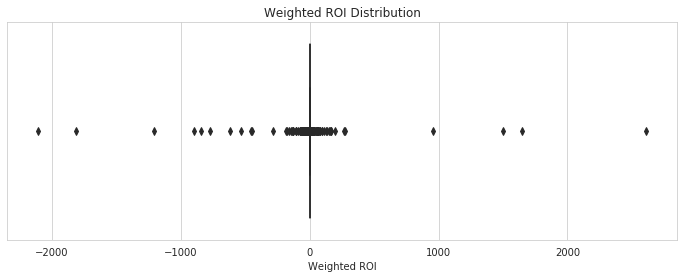

In [141]:
# plot weighted ROI quartiles

sns.boxplot(df['roi_weighted'], color=mp.colors(4))

plt.xlabel('Weighted ROI')
plt.title('Weighted ROI Distribution');

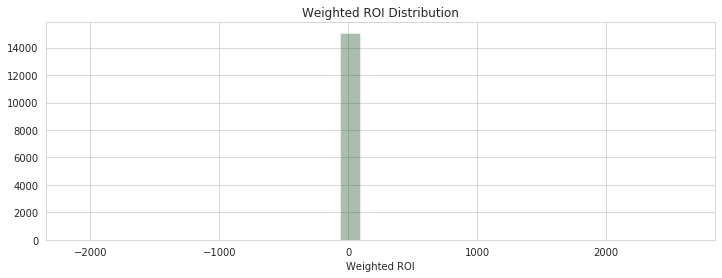

In [142]:
# plot weighted ROI distribution

sns.distplot(df['roi_weighted'], bins=30, color=mp.colors(4), 
             axlabel='Weighted ROI', kde=False)

plt.title('Weighted ROI Distribution');

In [143]:
# observe the percentage of actors with favorable ROI values
np.sum(df['roi_weighted'] > 0) / len(df['roi_weighted']) * 100

69.75345363209729

In [144]:
# move target variable to front of DataFrame
df.insert(0, 'roi_weighted', df.pop('roi_weighted'))

The last thing I will do to the dataset is rename some of the columns for clarity.

In [145]:
# assign better names to variables
df.rename(columns={'roi_weighted': 'actor_value', 'vote_weighted': 'rating'}, inplace=True)
df.head(11).transpose()

person_id,2,3,4,5,6,10,12,13,14,18,19
actor_value,6.771807,1.517763,0.726447,6.797869,0.092847,0.053415,0.385437,0.721246,2.356295,0.018303,0.026442
gender,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
age,48.000000,54.000000,42.000000,60.000000,51.000000,45.000000,10.000000,57.000000,52.000000,49.000000,50.000000
runtime,115.000000,120.000000,115.000000,100.000000,135.000000,95.000000,95.000000,110.000000,100.000000,95.000000,105.000000
rating,70.000000,67.000000,68.000000,70.000000,72.000000,77.000000,70.000000,68.000000,73.000000,66.000000,66.000000
action,9.000000,18.000000,6.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
adventure,8.000000,16.000000,6.000000,1.000000,9.000000,1.000000,1.000000,3.000000,1.000000,4.000000,4.000000
animation,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,5.000000
comedy,1.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,6.000000,1.000000,10.000000,20.000000
crime,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000


In [146]:
# look at final shape
df.shape

(15129, 24)

The only thing left to do for this part of the project is to look for correlations.

In [147]:
# get correlations
df.corr()

,actor_value,gender,age,runtime,rating,action,adventure,animation,comedy,crime,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
actor_value,1.000000,0.017429,-0.004283,-0.014894,0.014989,-0.017553,-0.013796,0.000664,-0.003489,-0.011878,...,-0.008477,0.029193,0.000260,0.006348,-0.017925,-0.007979,0.000614,-0.008586,-0.011252,0.000306
gender,0.017429,1.000000,-0.205342,-0.024557,-0.037003,-0.094486,-0.107828,-0.046811,-0.017783,-0.094155,...,-0.095207,-0.008453,0.008831,-0.043655,0.035217,-0.082162,-0.006048,-0.079731,-0.130718,-0.075020
age,-0.004283,-0.205342,1.000000,0.084602,0.084548,0.062199,0.094393,0.083596,0.076703,0.108714,...,0.106434,-0.001479,0.016392,0.086511,0.089810,0.053122,0.000841,0.093141,0.075568,0.082119
runtime,-0.014894,-0.024557,0.084602,1.000000,0.278898,0.067597,0.070058,-0.108369,-0.064144,0.049305,...,0.245048,-0.108160,0.029290,0.043441,0.068816,0.014138,-0.018749,0.052710,0.205121,0.083736
rating,0.014989,-0.037003,0.084548,0.278898,1.000000,-0.012861,0.045158,0.053909,-0.018248,0.047813,...,0.095542,-0.086652,0.027680,0.034686,0.043968,0.007300,-0.009961,0.008309,0.092601,0.045410
action,-0.017553,-0.094486,0.062199,0.067597,-0.012861,1.000000,0.716960,0.270786,0.426568,0.655139,...,0.349167,0.289354,0.108511,0.463066,0.336520,0.653858,0.019219,0.751838,0.357099,0.233843
adventure,-0.013796,-0.107828,0.094393,0.070058,0.045158,0.716960,1.000000,0.506693,0.526882,0.458661,...,0.386554,0.236839,0.167120,0.416260,0.431983,0.656509,0.028854,0.573933,0.333287,0.229086
animation,0.000664,-0.046811,0.083596,-0.108369,0.053909,0.270786,0.506693,1.000000,0.568344,0.213804,...,0.138732,0.087961,0.213587,0.157900,0.293731,0.285794,-0.005718,0.199098,0.096386,0.066165
comedy,-0.003489,-0.017783,0.076703,-0.064144,-0.018248,0.426568,0.526882,0.568344,1.000000,0.472642,...,0.228817,0.218990,0.306350,0.327663,0.660619,0.394531,-0.004807,0.397726,0.170081,0.120893
crime,-0.011878,-0.094155,0.108714,0.049305,0.047813,0.655139,0.458661,0.213804,0.472642,1.000000,...,0.333007,0.267172,0.144254,0.578416,0.394440,0.426692,0.005735,0.775861,0.290028,0.215949


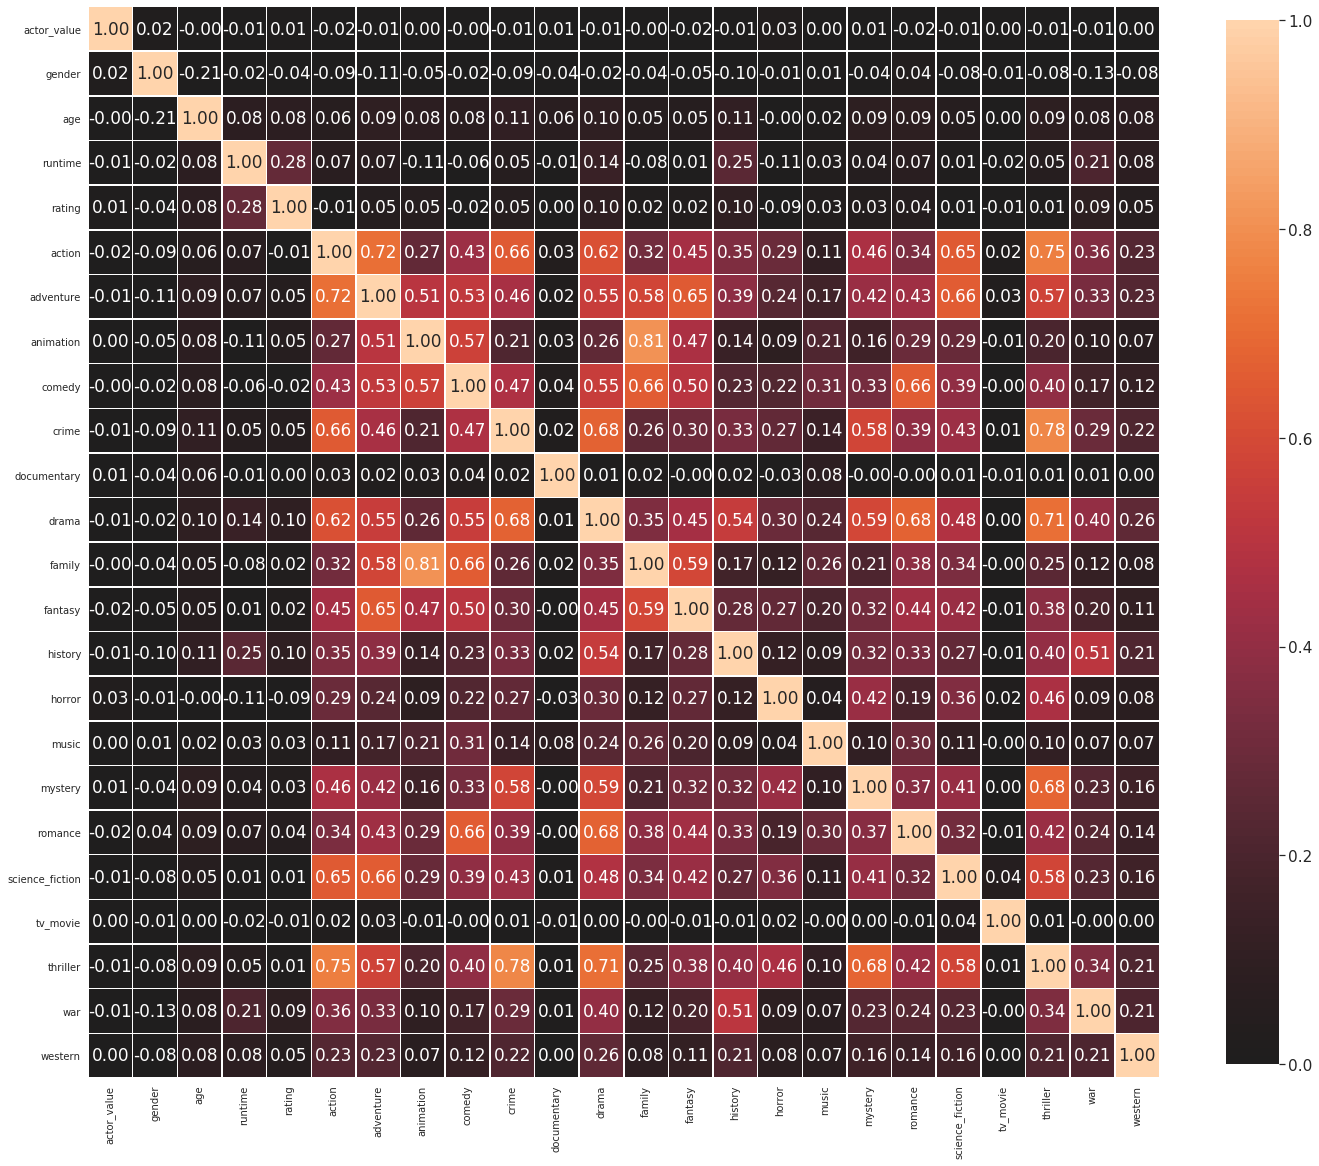

In [148]:
# plot heatmap of correlations
fig, ax = plt.subplots(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), vmin=0, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .80});

The heatmap looks great.<br>
The features with the highest correlations are the movie genres with each other.<br>
This can be observed as the inset colorful square within the main square.<br>
This is because the genres were once together in larger lists, many of which differed by the addition of only a single genre.

Documentary and TV movie are not correlated with any other features.<br>
As these are more akin to being movie types, as opposed to movie genres, that is not surprising.

History and war genres are positively correlated with runtime.

The strongest correlation for any actor data is a negative one between the actor age and gender.

The strongest correlation for any movie data that does not involve a genre is between the runtime and the rating.<br>
There is a significant increase in rating for movies that run longer.

As for correlations with the target variable, they are trivial.

In [149]:
# store clean dataset and actor names in JSON
df.to_json('capstone1_ds.json')
names_df.to_json('names.json')